In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [4]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Add custom layers on top of MobileNetV2
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the final model (fixed closing parenthesis)
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

In [9]:
# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 260s 322ms/step - accuracy: 0.1916 - loss: 2.2125 - val_accuracy: 0.2780 - val_loss: 1.9677
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 257s 315ms/step - accuracy: 0.2931 - loss: 1.9619 - val_accuracy: 0.3028 - val_loss: 1.9163
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 264s 318ms/step - accuracy: 0.3224 - loss: 1.8899 - val_accuracy: 0.3546 - val_loss: 1.8469
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 260s 315ms/step - accuracy: 0.3352 - loss: 1.8575 - val_accuracy: 0.3264 - val_loss: 1.8545
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 263s 317ms/step - accuracy: 0.3490 - loss: 1.8305 - val_accuracy: 0.3536 - val_loss: 1.8163


In [10]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 216ms/step


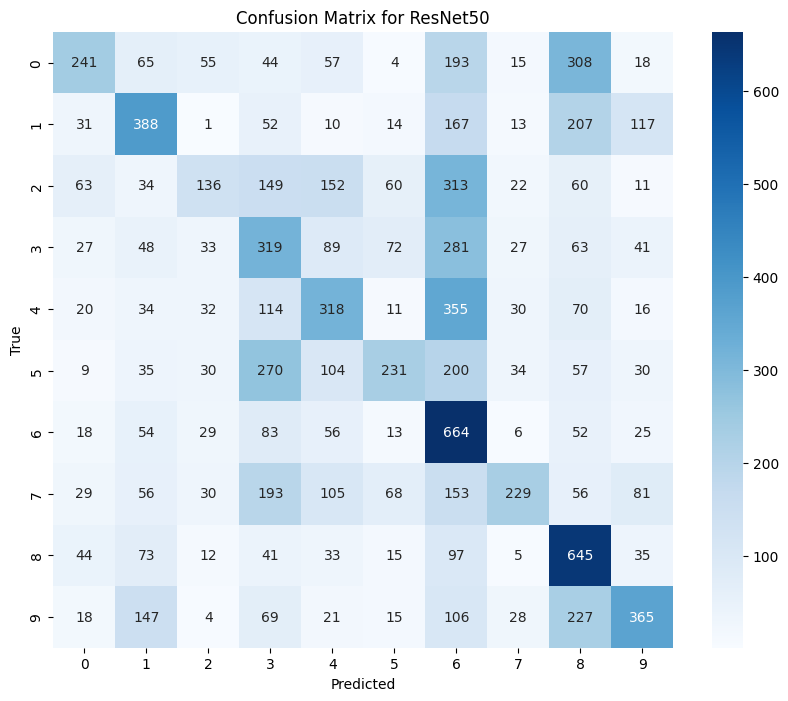

In [11]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ResNet50')
plt.show()